In [180]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
#importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [181]:
Train_data=pd.read_csv('train_agriculture.csv')
Test_data=pd.read_csv('test_agriculture.csv')


In [182]:
Train_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [183]:
Test_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [184]:
#Checking the columns
print('Train_data:',Train_data.shape)
print('/n')
print('Test_data:',Test_data.shape)

Train_data: (4599, 10)
/n
Test_data: (1199, 9)


# TRAIN DATA

In [185]:
Train_data.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [186]:
Train_data.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [187]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [188]:
Train_data.isnull().values.any()

True

In [189]:
#Checking for null values
Train_data.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [190]:
#for col in['Number_Weeks_Used']:Train_data[col].fillna(Train_data[col].mode()[0],inplace=True)
Train_data.dropna(inplace=True)

In [191]:
Train_data.isnull().values.any()

False

In [192]:
print(Train_data['Soil_Type'].value_counts())

0    2181
1    1976
Name: Soil_Type, dtype: int64


In [193]:
print(Train_data['Crop_Type'].value_counts())

0    3220
1     937
Name: Crop_Type, dtype: int64


In [194]:
Train_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [195]:
Train_data.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000
mean,1368.286264,0.225403,0.475343,2.282175,26.528747,28.891027,9.293481,1.891989,0.191484
std,815.550890,0.417898,0.499452,0.471010,15.651629,12.586005,9.753605,0.696910,0.452663
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,732.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


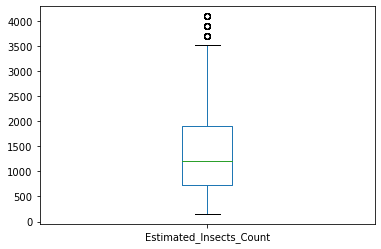

In [196]:
Train_data['Estimated_Insects_Count'].plot.box()
plt.show()

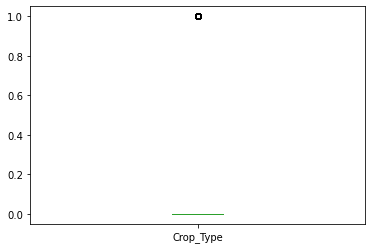

In [197]:
Train_data['Crop_Type'].plot.box()
plt.show()

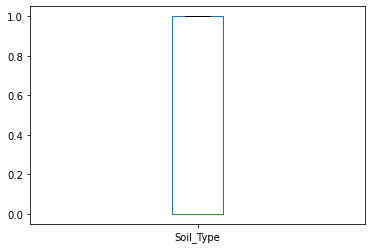

In [198]:
Train_data['Soil_Type'].plot.box()
plt.show()

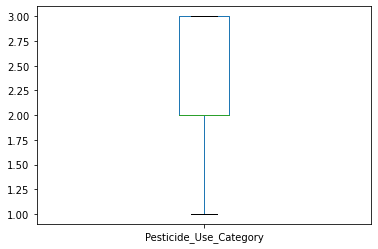

In [199]:
Train_data['Pesticide_Use_Category'].plot.box()
plt.show()

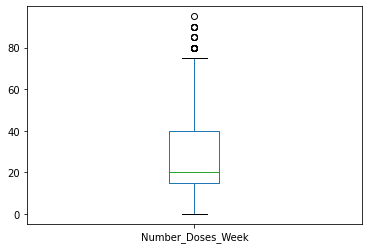

In [200]:
Train_data['Number_Doses_Week'].plot.box()
plt.show()

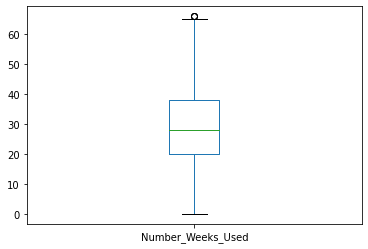

In [201]:
Train_data['Number_Weeks_Used'].plot.box()
plt.show()

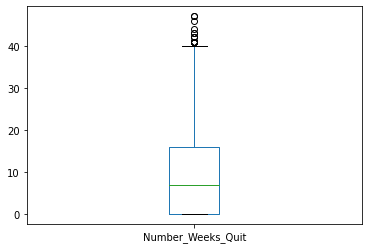

In [202]:
Train_data['Number_Weeks_Quit'].plot.box()
plt.show()

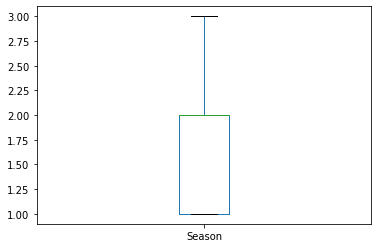

In [203]:
Train_data['Season'].plot.box()
plt.show()

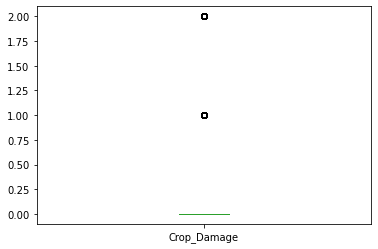

In [204]:
Train_data['Crop_Damage'].plot.box()
plt.show()

In [205]:
from sklearn.preprocessing import LabelEncoder
for column in Train_data.columns:
    if Train_data[column].dtype==np.number:
        continue
    else:
        Train_data[column]=LabelEncoder().fit_transform(Train_data[column])

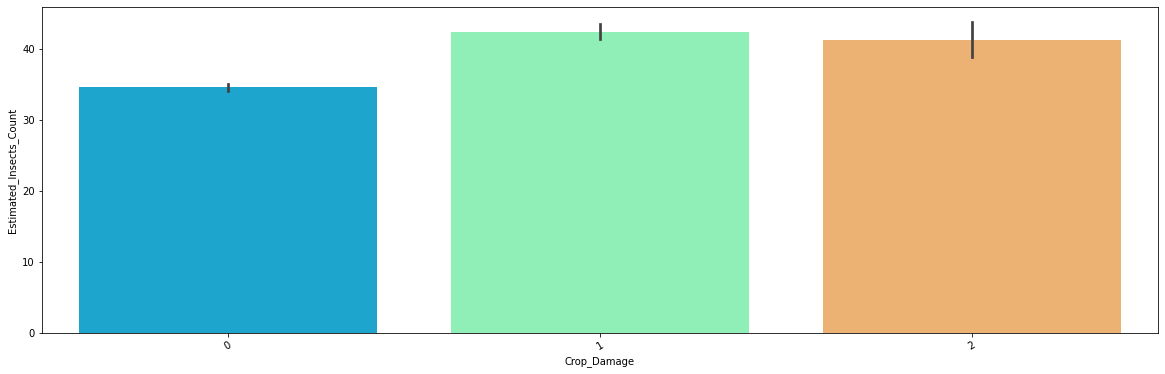

In [206]:
plt.figure(figsize=(20,6))
sn.barplot(y='Estimated_Insects_Count',x='Crop_Damage',data=Train_data,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

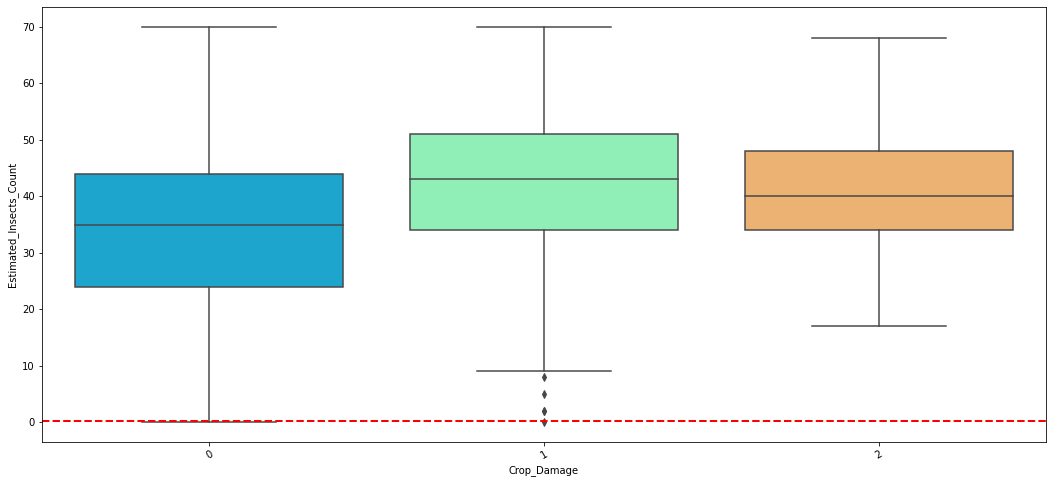

In [207]:
plt.figure(figsize=(18,8))
mean_price=np.mean(Train_data['Crop_Damage'])
sn.boxplot(y='Estimated_Insects_Count',x='Crop_Damage',data=Train_data,palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.xticks(rotation=30)
plt.show()

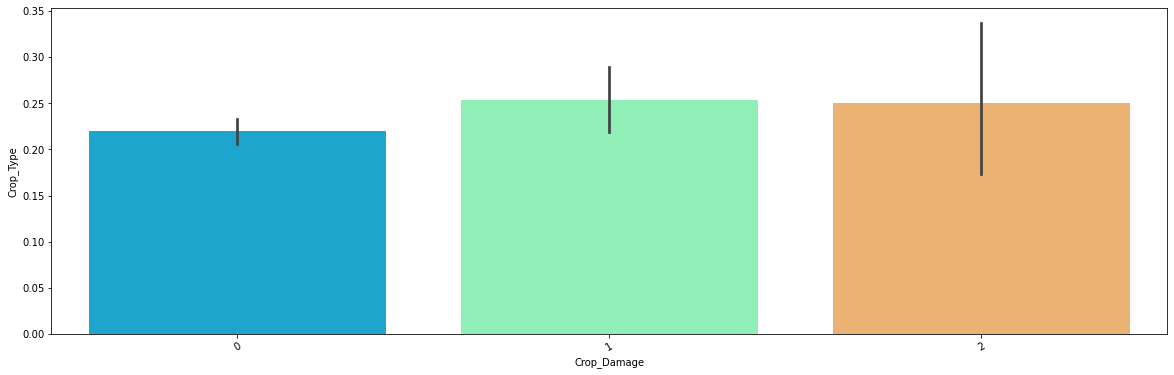

In [208]:
plt.figure(figsize=(20,6))
sn.barplot(y='Crop_Type',x='Crop_Damage',data=Train_data,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

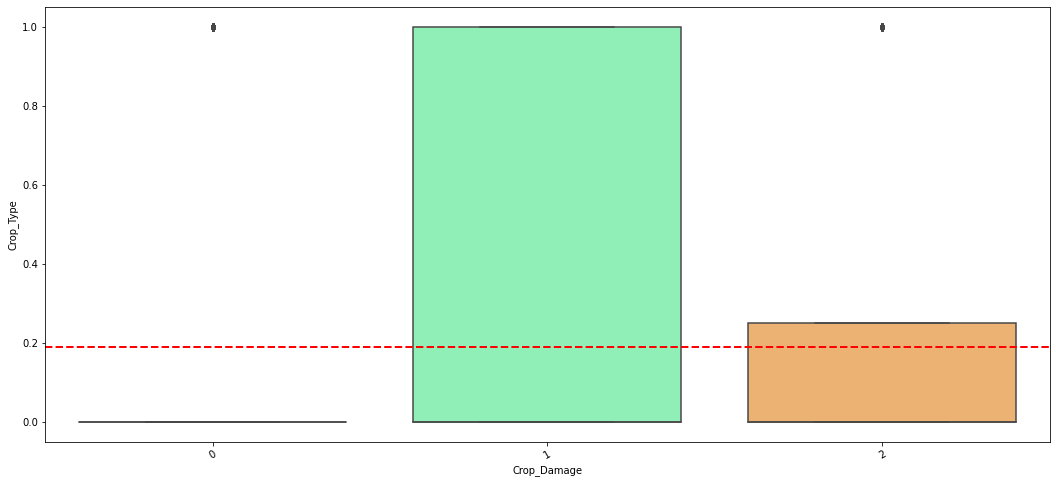

In [209]:
plt.figure(figsize=(18,8))
mean_price=np.mean(Train_data['Crop_Damage'])
sn.boxplot(y='Crop_Type',x='Crop_Damage',data=Train_data,palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.xticks(rotation=30)
plt.show()

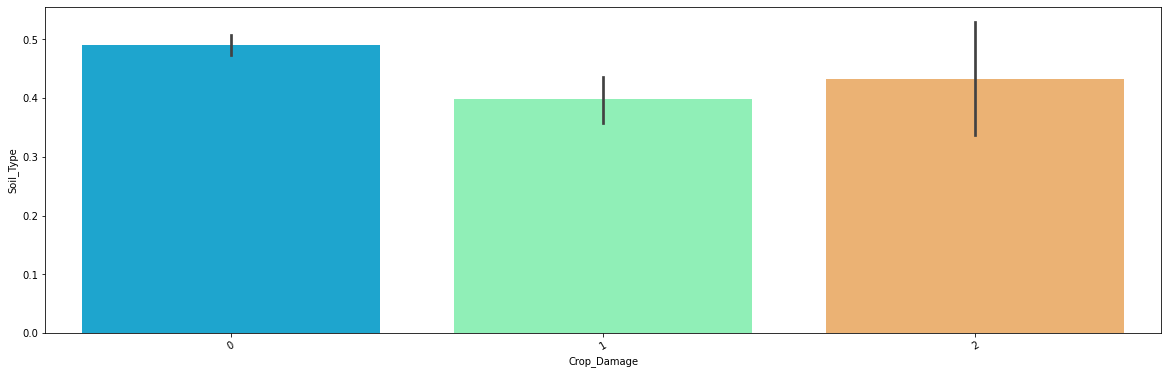

In [210]:
plt.figure(figsize=(20,6))
sn.barplot(y='Soil_Type',x='Crop_Damage',data=Train_data,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

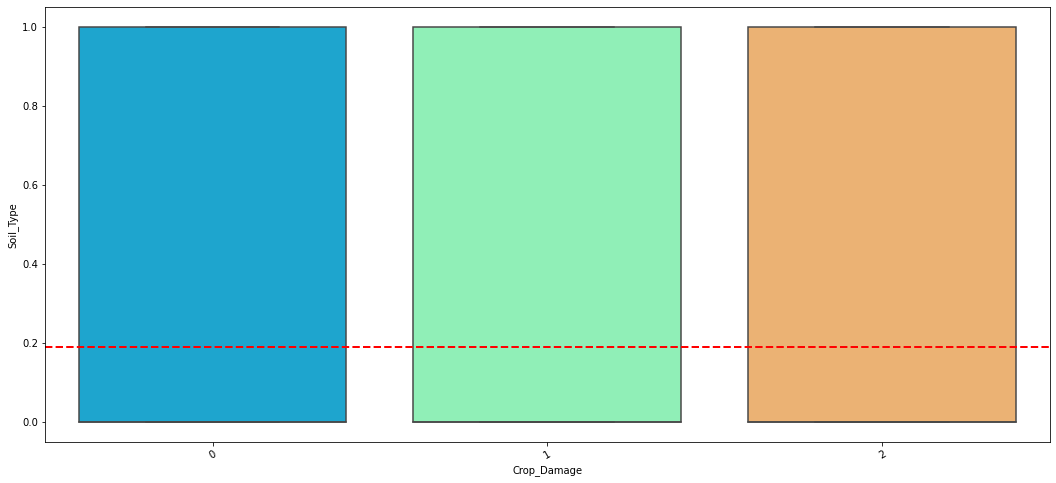

In [211]:
plt.figure(figsize=(18,8))
mean_price=np.mean(Train_data['Crop_Damage'])
sn.boxplot(y='Soil_Type',x='Crop_Damage',data=Train_data,palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.xticks(rotation=30)
plt.show()

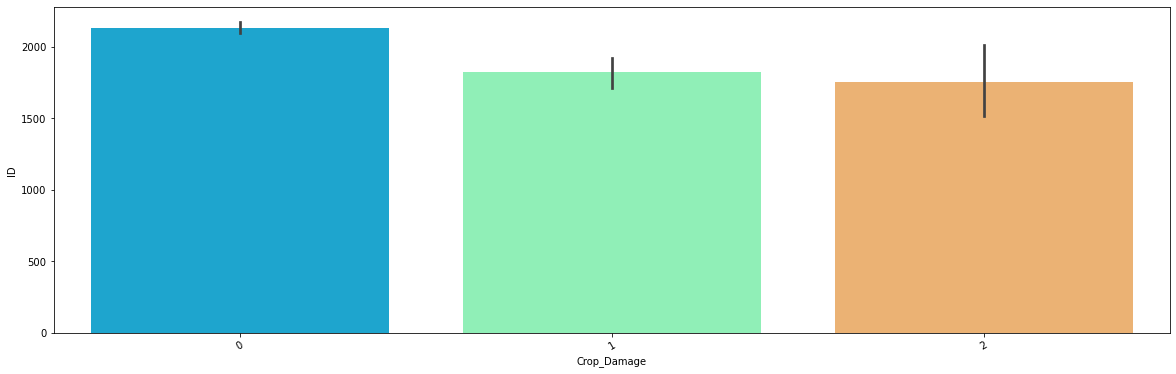

In [212]:
plt.figure(figsize=(20,6))
sn.barplot(y='ID',x='Crop_Damage',data=Train_data,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

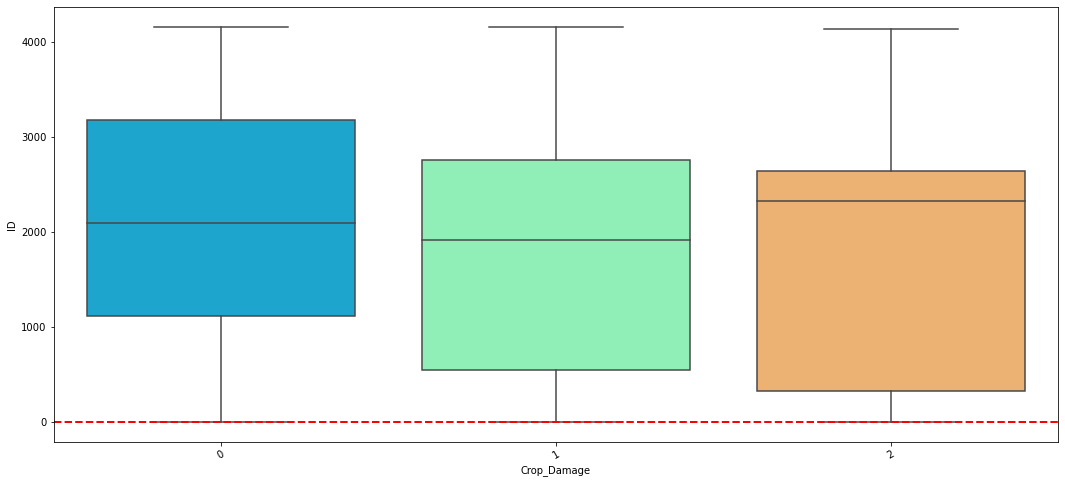

In [213]:
plt.figure(figsize=(18,8))
mean_price=np.mean(Train_data['Crop_Damage'])
sn.boxplot(y='ID',x='Crop_Damage',data=Train_data,palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.xticks(rotation=30)
plt.show()

In [214]:
#Converting ID column

ID=Train_data['ID']
ID=pd.get_dummies(ID,drop_first=True)
ID.head()

,1,2,3,4,5,6,7,8,9,10,...,4147,4148,4149,4150,4151,4152,4153,4154,4155,4156
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
Train_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,0,4,1,0,0,0,0.0,0,0,0
1,1,5,1,0,0,0,0.0,0,1,1
2,2,9,1,0,0,0,0.0,0,1,1
3,3,9,1,1,0,0,0.0,0,1,1
4,4,13,1,0,0,0,0.0,0,1,1


In [216]:
Train_data.shape

(4157, 10)

# Test data

In [217]:
Test_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [218]:
Test_data.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [219]:
Test_data.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [220]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [221]:
Train_data.isnull().values.any()

False

In [222]:
Test_data.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1080.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.782083,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,28.000000,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,38.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


In [223]:
#Converting ID column

ID=Test_data['ID']
ID=pd.get_dummies(ID,drop_first=True)
ID.head()

,F00000007,F00000011,F00000013,F00000014,F00000015,F00000016,F00000019,F00000025,F00000026,F00000027,...,F00003119,F00003120,F00003122,F00003130,F00003131,F00003133,F00003135,F00003138,F00003149,F00003150
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
Test_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [225]:
Test_data.shape

(1199, 9)

In [226]:
Test_data.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [227]:
#sEPRATING INTO input and output variables
#x=df.drop(['ID'],axis=1)
#y=y=Train_data['Estimated_Insects_count']

In [228]:
Train_data.corr()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
ID,1.000000,0.082655,-0.129025,0.126575,-0.305855,0.034646,-0.101040,0.248330,-0.021906,-0.096839
Estimated_Insects_Count,0.082655,1.000000,-0.060096,-0.143891,-0.064952,-0.104657,0.459729,0.276674,-0.018767,0.189826
Crop_Type,-0.129025,-0.060096,1.000000,-0.174532,0.355242,-0.165631,-0.002237,-0.272352,0.001822,0.027448
Soil_Type,0.126575,-0.143891,-0.174532,1.000000,0.020889,0.051378,-0.098399,-0.037524,0.003753,-0.057868
Pesticide_Use_Category,-0.305855,-0.064952,0.355242,0.020889,1.000000,-0.007122,0.387982,-0.571076,0.010773,0.202449
Number_Doses_Week,0.034646,-0.104657,-0.165631,0.051378,-0.007122,1.000000,0.104022,-0.032463,-0.006366,-0.017724
Number_Weeks_Used,-0.101040,0.459729,-0.002237,-0.098399,0.387982,0.104022,1.000000,-0.467404,-0.011108,0.244988
Number_Weeks_Quit,0.248330,0.276674,-0.272352,-0.037524,-0.571076,-0.032463,-0.467404,1.000000,0.002778,-0.155475
Season,-0.021906,-0.018767,0.001822,0.003753,0.010773,-0.006366,-0.011108,0.002778,1.000000,-0.016798
Crop_Damage,-0.096839,0.189826,0.027448,-0.057868,0.202449,-0.017724,0.244988,-0.155475,-0.016798,1.000000


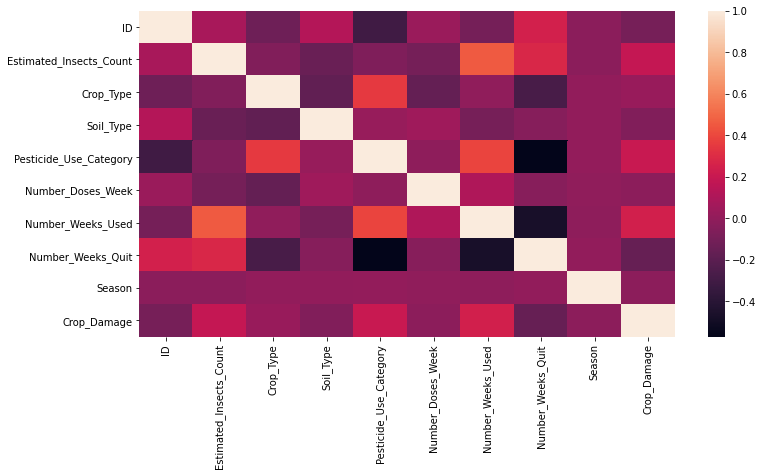

In [229]:
plt.figure(figsize=(12,6))
sn.heatmap(Train_data.corr())
plt.show()

Text(0.5, 1.0, 'Correlation with target Variable')

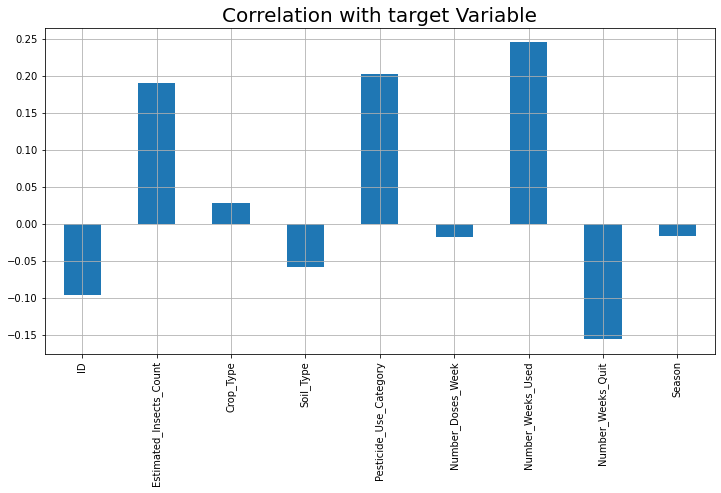

In [230]:
#Correlation with target column
plt.figure(figsize=(12,6))
Train_data.drop('Crop_Damage',axis=1).corrwith(Train_data['Crop_Damage']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable",fontsize=20)


In [231]:
from scipy.stats import zscore
z=np.abs(zscore(Train_data))
z

array([[1.7316342 , 2.28840313, 1.85377978, ..., 0.95313257, 1.28007374,
        0.42306851],
       [1.73080088, 2.21655729, 1.85377978, ..., 0.95313257, 0.15500353,
        1.78634832],
       [1.72996756, 1.92917394, 1.85377978, ..., 0.95313257, 0.15500353,
        1.78634832],
       ...,
       [1.72996756, 1.08835123, 0.5394384 , ..., 1.81618264, 0.15500353,
        0.42306851],
       [1.73080088, 1.08835123, 0.5394384 , ..., 1.50848095, 0.15500353,
        0.42306851],
       [1.7316342 , 1.08835123, 0.5394384 , ..., 0.79051034, 0.15500353,
        0.42306851]])

In [232]:
threshold=3
print(np.where(z>3))

(array([   5,    7,   11,   90,   93,  102,  136,  149,  150,  151,  162,
        168,  169,  179,  186,  199,  200,  219,  225,  227,  239,  240,
        262,  268,  274,  284,  293,  311,  316,  319,  325,  336,  339,
        411,  415,  422,  433,  462,  467,  472,  505,  551,  571,  627,
        726,  736,  770,  771,  822,  882,  897,  916,  918,  985, 1058,
       1090, 1158, 1174, 1189, 1191, 1192, 1194, 1202, 1204, 1205, 1211,
       1263, 1296, 1308, 1337, 1366, 1425, 1483, 1485, 1559, 1621, 1678,
       1814, 1837, 1880, 1925, 1928, 1929, 1949, 1953, 1954, 1963, 1965,
       1968, 1970, 2009, 2149, 2297, 2308, 2326, 2331, 2351, 2402, 2423,
       2436, 2439, 2441, 2448, 2487, 2499, 2510, 2514, 2515, 2521, 2523,
       2529, 2539, 2540, 2545, 2549, 2558, 2566, 2575, 2590, 2612, 2615,
       2617, 2620, 2621, 2704, 2732, 2735, 2745, 2770, 2790, 2808, 2861,
       2866, 2881, 2917, 2992, 3040, 3169, 3265, 3266, 3291, 3313, 3316,
       3344, 3345, 3366, 3391, 3452, 3462, 3463, 3

In [233]:
Train_new=Train_data[(z<3).all(axis=1)]

In [234]:
#Checking the shape
print(Train_data.shape,'\t\t',Train_new.shape)

(4157, 10) 		 (3983, 10)


In [235]:
Train_data=Train_new
Train_data.shape

(3983, 10)

# Feature Selection

In [236]:
Train_data.shape

(3983, 10)

In [237]:
Train_data.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [238]:
from sklearn.preprocessing import LabelEncoder
for column in Train_data.columns:
    if Train_data[column].dtype==np.number:
        continue
    else:
        Train_data[column]=LabelEncoder().fit_transform(Train_data[column])

In [239]:
x=Train_data.drop(columns=['Crop_Damage'],axis=1)
x.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,4,1,0,0,0,0.0,0,0
1,1,5,1,0,0,0,0.0,0,1
2,2,9,1,0,0,0,0.0,0,1
3,3,9,1,1,0,0,0.0,0,1
4,4,13,1,0,0,0,0.0,0,1


In [240]:
y=Train_data['Crop_Damage']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Crop_Damage, dtype: int64

In [241]:
#Checking the shapeof input and target variable
print(x.shape,'\t\t',y.shape)


(3983, 9) 		 (3983,)


In [242]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [243]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)


In [244]:
#Checking the shape
print(x_train.shape,'\t\t',x_test.shape)

(3186, 9) 		 (797, 9)


In [245]:
#Checking the shape
print(y_train.shape,'\t',y_test.shape)

(3186,) 	 (797,)


In [246]:
#import all the model library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [247]:
#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [248]:
#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [249]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),
      RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print("MAE",mean_absolute_error(y_test,predm))
    print("MSE",mean_squared_error(y_test,predm))
    print("RMSE",np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score:',r2_score(y_test,predm))
    print('********************************************')
    print('\n')
    
    

Score of LinearRegression() is: 0.089793213104292
MAE 0.23165790720478732
MSE 0.1132365578957544
RMSE 0.3365064009729301
R2_score: 0.08289072160647382
********************************************


Score of SVR() is: 0.14416736288872167
MAE 0.20333059801706813
MSE 0.11435327876635526
RMSE 0.33816161634099645
R2_score: 0.07384633619918701
********************************************


Score of DecisionTreeRegressor() is: 1.0
MAE 0.20200752823086573
MSE 0.20200752823086573
RMSE 0.44945247605377114
R2_score: -0.6360703812316715
********************************************


Score of KNeighborsRegressor() is: 0.3432290531809775
MAE 0.21606022584692597
MSE 0.12521957340025094
RMSE 0.35386377802800184
R2_score: -0.014160397806961766
********************************************


Score of Lasso() is: 0.0
MAE 0.24789996384747895
MSE 0.12347298438735657
RMSE 0.3513872285490134
R2_score: -1.4674738089803796e-05
********************************************


Score of RandomForestRegressor() is: 0

In [250]:
#Cross validate all algorithm by using for loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),
      RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print("Model:",m)
    print("Score",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print("******************************")
    print('\n')

Model: LinearRegression()
Score [-0.01907254  0.05395146  0.06516359 -0.06846652  0.03505101 -0.06113573
 -0.01057649 -0.04399028  0.05426834 -0.02732082]
Mean Score: -0.00221279897015213
Standard deviation: 0.04781647510412088
******************************


Model: SVR()
Score [-0.01727047  0.07320781 -0.02773591 -0.06962128 -0.01903736  0.09116139
 -0.169676   -0.03631621  0.02530518 -0.01170341]
Mean Score: -0.016168625509657496
Standard deviation: 0.06943973233346531
******************************


Model: DecisionTreeRegressor()
Score [-1.47946875 -3.27687329 -1.38567704 -0.75818063 -0.67869059 -1.17971602
 -0.7824932  -1.0108627  -1.14254953 -6.96721014]
Mean Score: -1.8661721894032588
Standard deviation: 1.8419990530451351
******************************


Model: KNeighborsRegressor()
Score [-0.02873644 -0.1394236  -0.06548283 -0.39091623 -0.01523198  0.0231643
 -0.09752409 -0.37140836 -0.09612834 -0.18678986]
Mean Score: -0.1368477429714728
Standard deviation: 0.135074054205965

# Random Forest Regressor giving best score and r2 score so i choose it asmy final model.

Using GridSearchCV to find the best parameters

In [253]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[400,500,600,700],'max_depth':[4,5,6,15,20]}
RFC=RandomForestRegressor()
clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 4, 'n_estimators': 500}


In [254]:
#Using Random Forest Regressor with its parameters
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=1,max_features='auto',max_depth=20)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('\n')
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score:',r2_score(y_test,y_pred))
print('********************************************')
print('\n')

Score: 0.5346030705667402


MAE 0.2071032179479552
MSE 0.10177159402460122
RMSE 0.3190166046220811
R2_score: 0.175746111580098
********************************************




Now our r2 score is increase.

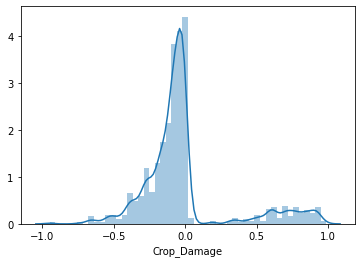

In [255]:
sn.distplot(y_test-y_pred)
plt.show()

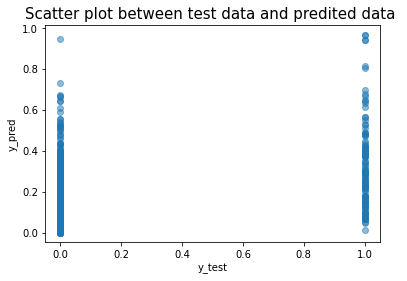

In [256]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Scatter plot between test data and predited data ",fontsize=15)
plt.show()